In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 2)

In [3]:
df = pd.read_json('chains.json', orient='records', lines = True)
del df['_id']
df

,first,second,timestamp_begin,timestamp_end,duration_sec,length
0,Kirk39,Windino,{'$date': '2018-05-11T13:05:23Z'},{'$date': '2018-05-11T16:07:49Z'},10946,3
1,Kirk39,Windino,{'$date': '2018-05-11T13:05:23Z'},{'$date': '2018-05-11T16:26:35Z'},12072,4
2,Gwenaeth,Marcorega,{'$date': '2007-05-02T20:31:48Z'},{'$date': '2007-05-04T19:20:06Z'},82098,3
3,Pebbles,Marcok,{'$date': '2011-12-19T18:02:30Z'},{'$date': '2011-12-19T18:54:31Z'},3121,3
4,Gacio,Simone24maggio,{'$date': '2006-12-01T17:52:09Z'},{'$date': '2006-12-02T15:37:38Z'},78329,3
...,...,...,...,...,...,...
120246,Caceo,RanZag,{'$date': '2009-10-16T18:32:25Z'},{'$date': '2009-10-16T20:23:59Z'},6694,3
120247,Caceo,RanZag,{'$date': '2009-10-16T21:38:43Z'},{'$date': '2009-10-16T22:01:37Z'},1374,3
120248,Caceo,RanZag,{'$date': '2009-10-16T21:38:43Z'},{'$date': '2009-10-16T23:16:26Z'},5863,6
120249,Caceo,RanZag,{'$date': '2009-10-16T21:38:43Z'},{'$date': '2009-10-17T01:01:23Z'},12160,5


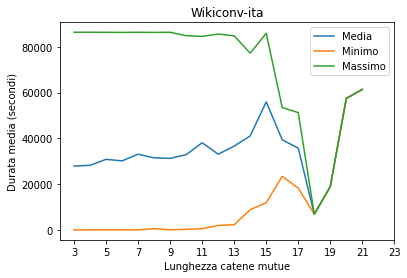

In [4]:
x = df.groupby(by='length', as_index=False)['duration_sec'].mean()
y = df.groupby(by='length', as_index=False)['duration_sec'].min()
z = df.groupby(by='length', as_index=False)['duration_sec'].max()
l_media, = plt.plot(x['length'], x['duration_sec'], label='Media')
l_minimo, = plt.plot(x['length'], y['duration_sec'], label='Minimo')
l_massimo, = plt.plot(x['length'], z['duration_sec'], label='Massimo')

plt.xticks(range(3,25,2))
plt.title("Wikiconv-ita")
plt.xlabel("Lunghezza catene mutue")
plt.ylabel("Durata media (secondi)")


plt.legend([l_media, l_minimo, l_massimo], ['Media', 'Minimo', 'Massimo'])
plt.show()

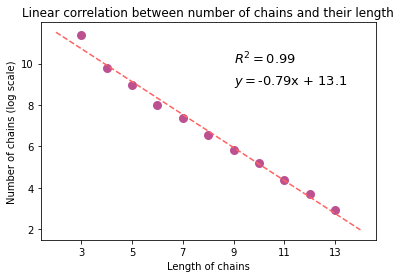

[[ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]]
Score: 0.9894933685577517
Coefficienti: [-0.79463327]
Intercetta: 13.09922134417462


In [14]:
# Numero di catene rispetto alla loro lunghezza

from sklearn.linear_model import LinearRegression


df_numero_catene = df.groupby(by='length', as_index=False)['first'].count()
df_numero_catene['count'] = df_numero_catene['first']
del df_numero_catene['first']


log_y = np.log(df_numero_catene['count'].to_numpy())[:11]
X = x['length'].to_numpy().reshape(-1,1)[:11]
reg = LinearRegression().fit(X, log_y)

plt.scatter(X, log_y, color='#bc5090', linewidths=3)

x_retta = np.linspace(np.min(X)-1, np.max(X)+1, 100)
y_retta = reg.coef_[0]*x_retta + reg.intercept_
plt.plot(x_retta, y_retta, '--', color='#ff6361')


plt.xticks(range(np.min(X), np.max(X)+1, 2))
plt.title("Linear correlation between number of chains and their length")
plt.xlabel("Length of chains")

plt.ylabel("Number of chains (log scale)")
plt.text(9, 10, f'$R^2=${round(reg.score(X, log_y), 2)}', fontsize=13)
plt.text(9, 9, f'$y=${round(reg.coef_[0], 2)}x + {round(reg.intercept_, 2)}', fontsize=13)

plt.show()


print(X)
print(f"Score: {reg.score(X, log_y)}")
print(f"Coefficienti: {reg.coef_}")
print(f"Intercetta: {reg.intercept_}")
